In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* PassengerId : 탑승자 데이터 일련번호
* Survived : 생존 여부, 0 = 사망, 1 = 생존
* Pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* Sex : 탑승자 성별
* Name : 탑승자 이름
* Age : 탑승자 나이
* SibSp : 같이 탑승한 형제자매 또는 배우자 인원수
* Parch : 같이 탑승한 부모님 또는 어린이 인원수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 선실 번호
* Embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton  

In [6]:
print("### train 데이터 정보\n")
print(titanic_df.info())

### train 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### NULL 컬럼들에 대한 처리

In [10]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)


print(f"데이터 세트 Null 값 갯수: {titanic_df.isnull().sum().sum()}")

데이터 세트 Null 값 갯수: 0


### 주요 컬럼 EDA

In [14]:
# object 컬럼타입 추출
titanic_df.dtypes[titanic_df.dtypes=='object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [20]:
print(f"# Sex 값 분포: \n", titanic_df['Sex'].value_counts())
print(f"\n# Cabin 값 분포: \n", titanic_df['Cabin'].value_counts())
print(f"\n# Embarked 값 분포: \n {titanic_df['Cabin'].value_counts()}")

# Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

# Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

# Embarked 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64


In [22]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [24]:
titanic_df.groupby(['Cabin'])['Cabin'].count()

Cabin
A     15
B     47
C     59
D     33
E     32
F     13
G      4
N    687
T      1
Name: Cabin, dtype: int64

In [25]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [26]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

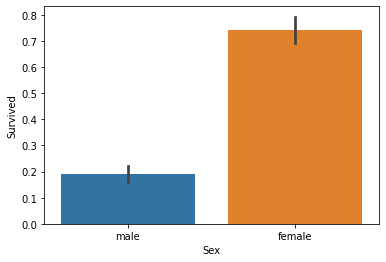

In [27]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

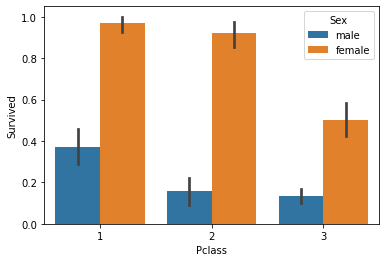

In [28]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

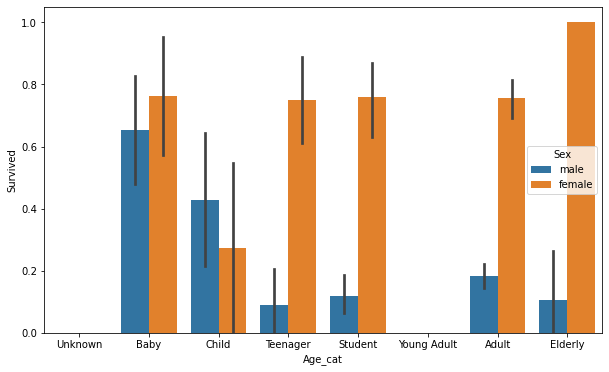

In [29]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 5: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
pit.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category()는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder 

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF 

titanic_df = encode_features(titanic_df)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

# NULL 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def encode_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df 

# 앞에서 설정한 Data Preprocessing 함수 호출 
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [4]:
# 원본 데이터를 재로딩하고, feature데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('./titanic_train.csv')

Y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1, inplace=False)
X_titanic_df = transform_features(X_titanic_df)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_df, Y_titanic_df, test_size=0.2, random_state=11)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)
print(f"DecisionTreeClassifier 정확도: {accuracy_score(Y_test, dt_pred):.4f}")

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RandomForestClassifier 정확도: {accuracy_score(Y_test, rf_pred):.4f}")

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LogisticRegression 정확도: {accuracy_score(Y_test, lr_pred):.4f}")

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


In [16]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for cnt, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        Y_train, Y_test = Y_titanic_df.values[train_index], Y_titanic_df.values[test_index]
        
        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        scores.append(accuracy)
        print(f"교차 검증 {cnt + 1} 정확도: {accuracy:.4f}")
    
    mean_score = np.mean(scores)
    print(f"평균 정확도: {mean_score:.4f}")

exec_kfold(dt_clf, folds=5)

교차 검증 1 정확도: 0.7542
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.7697
교차 검증 5 정확도: 0.8202
평균 정확도: 0.7823


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, Y_titanic_df, cv=5)
for cnt, accuracy in enumerate(scores):
    print(f"교차 검증{cnt} 정확도: {accuracy:.4f}")

print(f"평균 정확도: {np.mean(scores):.4f}")

교차 검증0 정확도: 0.7430
교차 검증1 정확도: 0.7753
교차 검증2 정확도: 0.7921
교차 검증3 정확도: 0.7865
교차 검증4 정확도: 0.8427
평균 정확도: 0.7879


In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, Y_train)

print(f"GridSearchCV 최적 하이퍼 파라미터: {grid_dtree.best_params_}")
print(f"GridSearchCV 최고 정확도: {grid_dtree.best_score_:.4f}")
best_dclf = grid_dtree.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(Y_test, dpredictions)
print(f"테스트 세트에서의 정확도: {accuracy:.4f}")

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 정확도: 0.8715
